In [1]:
import glob
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorly
from tensorly.decomposition import parafac as cp
from scipy.io import loadmat
import tensorly as tl
%matplotlib inline

In [2]:
mat = loadmat('heatT.mat')
t1 = mat["T1"][0][0][0]
t2 = mat["T2"][0][0][0]
t3 = mat["T3"][0][0][0]

In [3]:
max_rank = np.min([np.multiply(*x) for x in combinations(t1.shape, 2)])

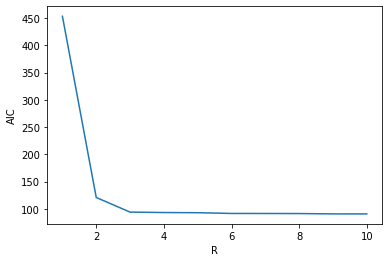

In [4]:
aic = []
for k in range(1,11):
    kt,e = cp(t1,k)
    reconstructed = tensorly.kruskal_to_tensor((kt,e))  
    err = ((t1-reconstructed)**2).sum()
    aic.append(2*err + 2*k)

plt.plot(np.arange(1,11),aic)
plt.xlabel('R')
plt.ylabel('AIC')
plt.show()   

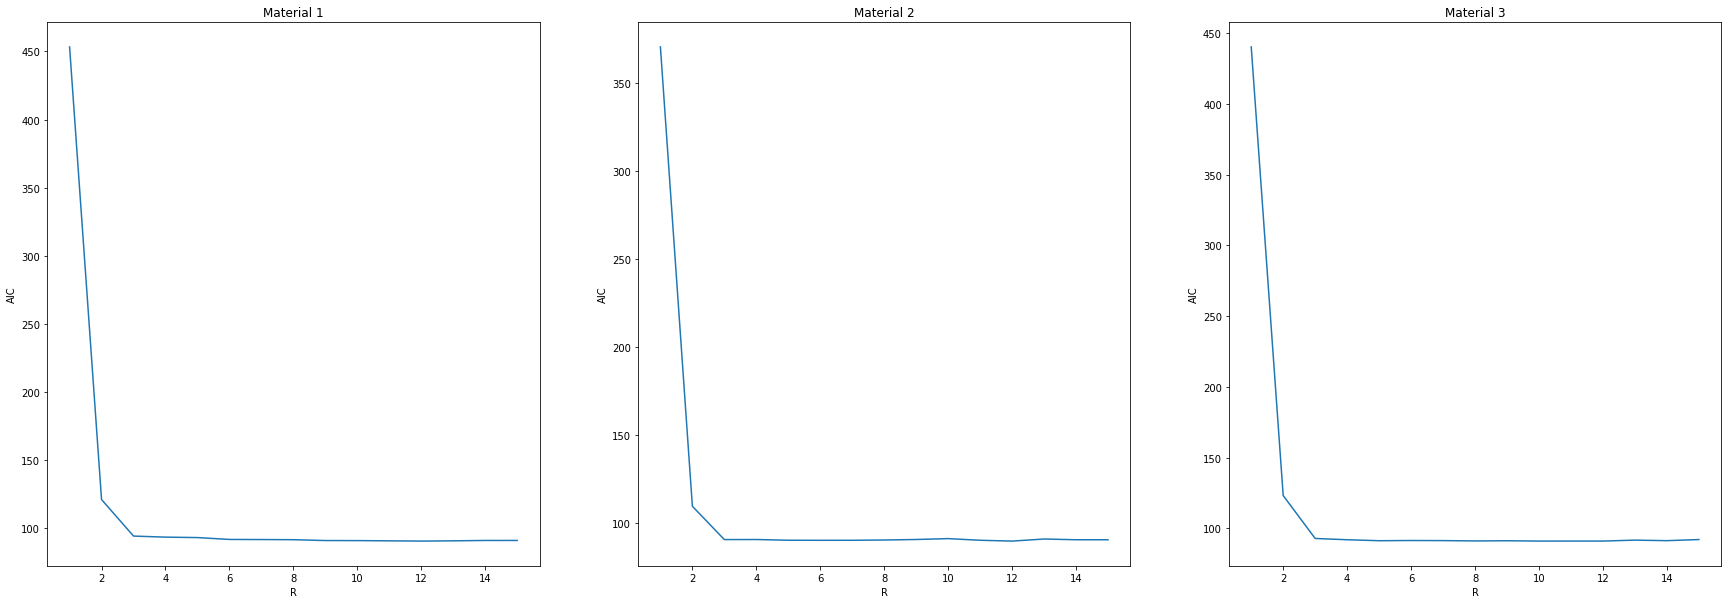

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(30,10))
images = []
min_aic = []
max_rank = 16
for i,t in enumerate([t1,t2,t3]):
    aic = []
    for k in range(1,max_rank):
        wf = cp(t,k)
        reconstructed = tensorly.kruskal_to_tensor(wf)  
        err = ((t-reconstructed)**2).sum()
        aic.append(2*err + 2*k)
    min_aic.append(np.argmin(aic)+1)
    ax[i].plot(np.arange(1,max_rank),aic)
    ax[i].set(xlabel='R', ylabel='AIC')
    ax[i].set_title(f'Material {i+1}')

In [6]:
# rank with min aic
min_aic

[12, 12, 10]

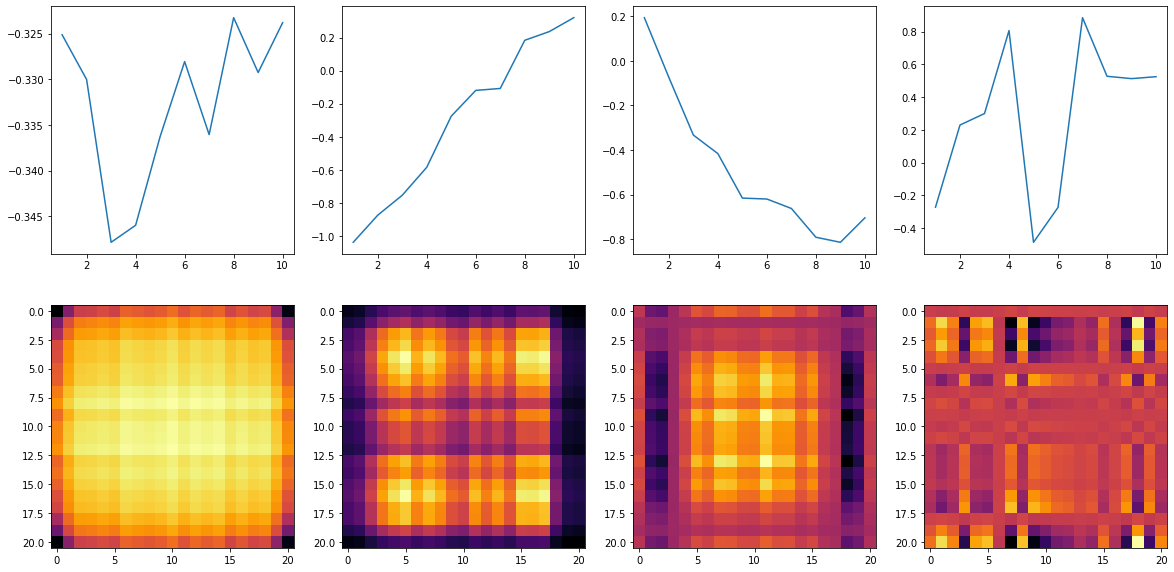

In [7]:
# material 1
wf = cp(t1,min_aic[0])

fig, ax = plt.subplots(2, 4, figsize=(20,10))
a,b,c = wf[1]
for i in range(4):
    ax[0,i].plot(np.arange(1,11),c[:,i])
    A = a[:,i]
    B = b[:,i]
    XY = np.outer(A,B)
    ax[1,i].imshow(XY,cmap='inferno')
    

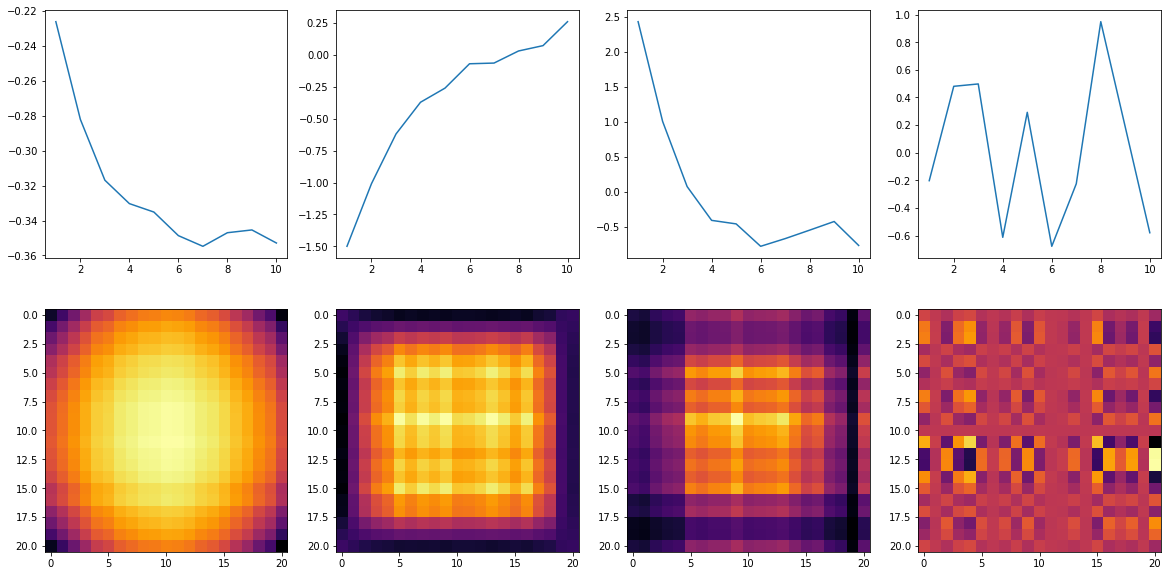

In [8]:
# material 2
wf = cp(t2,min_aic[1])

fig, ax = plt.subplots(2, 4, figsize=(20,10))
a,b,c = wf[1]
for i in range(4):
    ax[0,i].plot(np.arange(1,11),c[:,i])
    A = a[:,i]
    B = b[:,i]
    XY = np.outer(A,B)
    ax[1,i].imshow(XY,cmap='inferno')

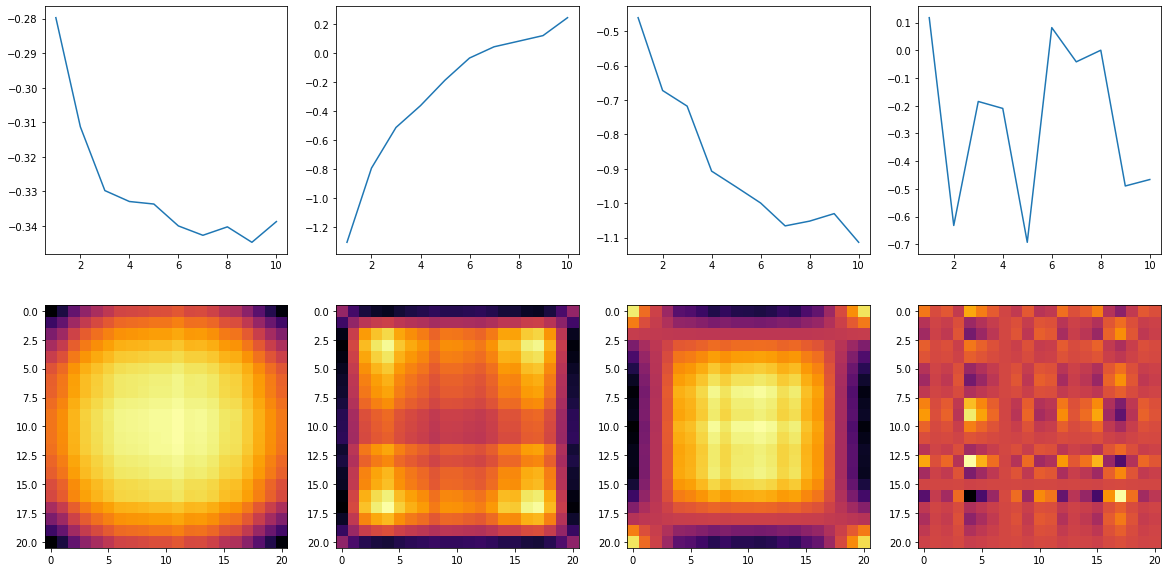

In [9]:
# material 3
wf = cp(t3,min_aic[2])

fig, ax = plt.subplots(2, 4, figsize=(20,10))
a,b,c = wf[1]
for i in range(4):
    A = a[:,i]
    B = b[:,i]
    C = c[:,i]
    
    ax[0,i].plot(np.arange(1,11),C)
    XY = np.outer(A,B)
    ax[1,i].imshow(XY,cmap='inferno')

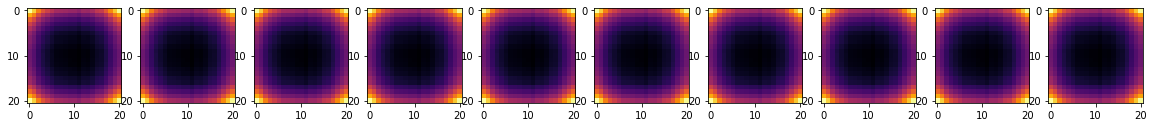

In [14]:
# just for fun
fig, ax = plt.subplots(1, 10, figsize=(20,10))
a,b,c = wf[1]
A = a[:,0]
B = b[:,0]
C = c[:,0]
XY = np.outer(A,B)
for i in range(10):
    t = XY*C[i]
    ax[i].imshow(t,cmap='inferno')